In [68]:
import numpy as np
import scipy as sc
import os, re
import matplotlib.pyplot as plt
from prettyprint import pp
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cross_validation import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from datetime import datetime as dt
from ipy_table import *
from string import punctuation, digits

In [69]:
data_path = '/Users/alexandre/Projects/TextClassificationBayes/tok_vnexpress/'
stopwords_path = '/Users/alexandre/Projects/TextClassificationBayes/vietnamese-stopwords-dash.txt'

#Classes are the folder names
class_names = os.listdir(data_path)
folders =  [data_path + folder + '/' for folder in os.listdir(data_path) if folder != ".DS_Store"]

if '.DS_Store' in class_names: del class_names[0]


#list the files of each class
files = {}

for folder, name in zip(folders, class_names):
    files[name] = [folder + f for f in os.listdir(folder)]
    
train_test_ratio = 0.6

In [70]:
def train_test_split(ratio, classes, files):
   
    train_dict = {}
    test_dict = {}
    for cl in classes:
        train_cnt = int(ratio * len(files[cl]))
        train_dict[cl] = files[cl][:train_cnt]
        test_dict[cl] = files[cl][train_cnt:]
    return train_dict, test_dict


train_path, test_path = train_test_split(train_test_ratio, class_names, files)
stop_word = []

def loadStopWord(path):

    from string import punctuation, digits
    stop_word = []
    try:
        f = open(path)
        lines = [line.rstrip('\n') for line in open(path)]
        lines = [line.replace(' ', '_') for line in lines]
            
    finally:
        f.close()
    return lines

stop_word = loadStopWord(stopwords_path)


def cleanupText(path):

    text_cleaned = ''
    stop_word = loadStopWord(stopwords_path)
    
    try:
        f = open(path)
        raw = f.read().lower()
        text =  raw   
        text_cleaned = re.sub(r'[-.?!,":;()/|0-9]','', text)
        
        splitword = text_cleaned.split(" ")
        
        for word in splitword:
            if word in stop_word:
                splitword.remove(word)
        text_cleaned = " ".join(splitword)
#        # print "\n Word count after:" + str(len(text_translated.split())) + "\n"
#        text_cleaned = ' '.join([word for word in text_cleaned.split(' ') if (word and len(word) > 1)])
    finally:
        f.close()
    return text_cleaned

In [71]:
train_arr = []
test_arr = []
train_lbl = []
test_lbl = []


for cl in class_names:
    for path in train_path[cl]:
        train_arr.append(cleanupText(path))
        train_lbl.append(cl)
    for path in test_path[cl]:
        test_arr.append(cleanupText(path))
        test_lbl.append(cl)
        
print "Train size:" + str(len(train_arr))
print "Test  size:" + str(len(test_arr))

Train size:28488
Test  size:18999


In [72]:
vectorizer = CountVectorizer()
vectorizer.fit(train_arr)
train_mat = vectorizer.transform(train_arr)
print train_mat.shape

test_mat = vectorizer.transform(test_arr)
print test_mat.shape

#tfidf = TfidfTransformer()
#tfidf.fit(train_mat)
#train_tfmat = tfidf.transform(train_mat)
#print train_tfmat.shape
#print train_tfmat
#test_tfmat = tfidf.transform(test_mat)
#print test_tfmat.shape

(28488, 120824)
(18999, 120824)


In [73]:
def testClassifier(x_train, y_train, x_test, y_test, clf):
    
 
    start = dt.now()
    clf.fit(x_train, y_train)
    end = dt.now()
    print 'training time: ', (end - start)

    
    start = dt.now()
    yhat = clf.predict(x_test)
    end = dt.now()
    print 'testing time: ', (end - start)
    
    print 'classification report: '

    pp(classification_report(y_test, yhat))
    
    print 'f1 score'
    print f1_score(y_test, yhat, average='macro')
    
    print 'accuracy score'
    accuracy = accuracy_score(y_test, yhat)
    print accuracy
 
    print 'confusion matrix:'
    print confusion_matrix(y_test, yhat)
    
    # plot the confusion matrix
    plt.imshow(confusion_matrix(y_test, yhat), interpolation='nearest')
    plt.show()
    
    return accuracy





In [74]:
metrics_dict = {}

In [75]:
mnb = MultinomialNB(alpha=0.01)
k_fold = KFold(len(train_lbl), n_folds=10, shuffle=True, random_state=0)
cross = cross_val_score(mnb, train_mat, train_lbl, cv=k_fold, n_jobs=1)
print "Cross validation score for MultinomialNB " 
print cross

print "Accuracy: %0.2f (+/- %0.2f)" % (cross.mean(), cross.std() * 2)

Cross validation score for MultinomialNB 
[ 0.91365391  0.91435591  0.91365391  0.91540892  0.91611092  0.90698491
  0.91119691  0.91505792  0.90941011  0.91292135]
Accuracy: 0.91 (+/- 0.01)


In [76]:
bnb = BernoulliNB(alpha=0.01)
k_fold = KFold(len(train_lbl), n_folds=10, shuffle=True, random_state=0)
cross = cross_val_score(bnb, train_mat, train_lbl, cv=k_fold, n_jobs=1)
print "Cross validation score for BernoulliNB" 
print cross
print "Accuracy: %0.2f (+/- %0.2f)" % (cross.mean(), cross.std() * 2)

Cross validation score for BernoulliNB
[ 0.86451386  0.87118287  0.86802387  0.88346788  0.87539488  0.85538786
  0.86416286  0.86170586  0.87148876  0.86130618]
Accuracy: 0.87 (+/- 0.02)


alpha= =1
training time:  0:00:00.125388
testing time:  0:00:00.048993
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.86      0.85      1578
   giai-tri       0.92      0.97      0.95      1830
   giao-duc       0.90      0.86      0.88      1687
   khoa-hoc       0.90      0.88      0.89      1760
 kinh-doanh       0.79      0.89      0.84      1800
 oto-xe-may       0.98      0.90      0.94      1682
  phap-luat       0.89      0.90      0.89      1800
     so-hoa       0.94      0.83      0.88      1610
   the-gioi       0.89      0.93      0.91      1792
   the-thao       0.99      0.98      0.99      1830
    thoi-su       0.80      0.81      0.80      1630

avg / total       0.90      0.89      0.89     18999
"
f1 score
0.892622335568
accuracy score
0.893731249013
confusion matrix:
[[1355   19    6   58   44    0   10    3   44    0   39]
 [  10 1779   12    4    8    0    3    2   10    0    2]
 [  22   44 1454   43  

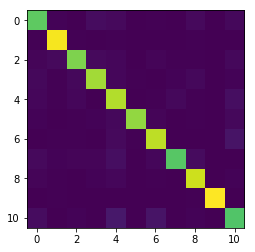

alpha= =0.75
training time:  0:00:00.140139
testing time:  0:00:00.052240
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.86      0.85      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.90      0.86      0.88      1687
   khoa-hoc       0.90      0.89      0.89      1760
 kinh-doanh       0.81      0.88      0.84      1800
 oto-xe-may       0.98      0.91      0.94      1682
  phap-luat       0.88      0.91      0.90      1800
     so-hoa       0.94      0.83      0.88      1610
   the-gioi       0.89      0.93      0.91      1792
   the-thao       0.99      0.98      0.99      1830
    thoi-su       0.80      0.81      0.81      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.894108918045
accuracy score
0.895310279488
confusion matrix:
[[1351   19    6   63   42    0   10    2   45    0   40]
 [  10 1779   12    4    7    0    3    3   10    0    2]
 [  22   44 1454   4

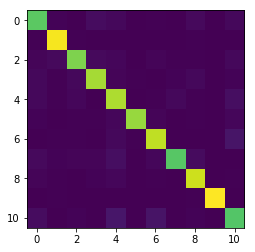

alpha= =0.5
training time:  0:00:00.148180
testing time:  0:00:00.053244
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.85      0.85      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.90      0.86      0.88      1687
   khoa-hoc       0.89      0.89      0.89      1760
 kinh-doanh       0.82      0.87      0.84      1800
 oto-xe-may       0.98      0.92      0.95      1682
  phap-luat       0.89      0.91      0.90      1800
     so-hoa       0.94      0.84      0.89      1610
   the-gioi       0.89      0.93      0.91      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.82      0.81      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.896394036995
accuracy score
0.897678825201
confusion matrix:
[[1347   19    6   66   41    1   10    2   46    0   40]
 [  10 1779   12    4    7    0    3    3   10    0    2]
 [  23   42 1454   45

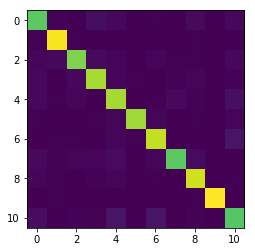

alpha= =0.25
training time:  0:00:00.126542
testing time:  0:00:00.053147
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.85      0.85      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.90      0.86      0.88      1687
   khoa-hoc       0.89      0.89      0.89      1760
 kinh-doanh       0.83      0.86      0.85      1800
 oto-xe-may       0.98      0.93      0.95      1682
  phap-luat       0.89      0.91      0.90      1800
     so-hoa       0.94      0.84      0.89      1610
   the-gioi       0.89      0.94      0.91      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.80      0.82      0.81      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.89781520612
accuracy score
0.899152586978
confusion matrix:
[[1344   19    5   72   39    1    9    2   45    0   42]
 [  10 1778   13    4    6    0    3    5    9    0    2]
 [  22   39 1456   46

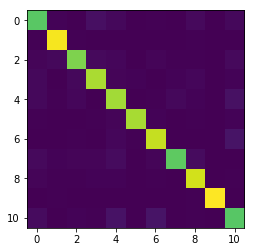

alpha= =0.1
training time:  0:00:00.123759
testing time:  0:00:00.051225
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.85      0.85      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.91      0.86      0.88      1687
   khoa-hoc       0.89      0.89      0.89      1760
 kinh-doanh       0.84      0.86      0.85      1800
 oto-xe-may       0.97      0.94      0.95      1682
  phap-luat       0.89      0.92      0.90      1800
     so-hoa       0.94      0.84      0.89      1610
   the-gioi       0.89      0.94      0.92      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.82      0.82      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.899576464182
accuracy score
0.900994789199
confusion matrix:
[[1348   18    5   73   37    1    7    2   45    0   42]
 [  10 1782   11    4    4    1    2    5    9    0    2]
 [  23   39 1450   45

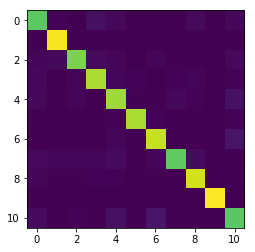

alpha= =0.075
training time:  0:00:00.121640
testing time:  0:00:00.050459
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.86      0.85      1578
   giai-tri       0.94      0.97      0.95      1830
   giao-duc       0.91      0.86      0.88      1687
   khoa-hoc       0.89      0.89      0.89      1760
 kinh-doanh       0.84      0.86      0.85      1800
 oto-xe-may       0.97      0.94      0.95      1682
  phap-luat       0.89      0.92      0.90      1800
     so-hoa       0.94      0.85      0.89      1610
   the-gioi       0.89      0.94      0.92      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.83      0.82      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.900548827693
accuracy score
0.901942207485
confusion matrix:
[[1352   18    5   72   38    1    7    2   45    0   38]
 [  10 1784   10    4    4    1    2    5    8    0    2]
 [  23   38 1449   

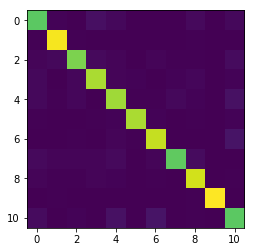

alpha= =0.05
training time:  0:00:00.119375
testing time:  0:00:00.056190
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.86      0.85      1578
   giai-tri       0.93      0.98      0.95      1830
   giao-duc       0.91      0.86      0.88      1687
   khoa-hoc       0.89      0.89      0.89      1760
 kinh-doanh       0.84      0.86      0.85      1800
 oto-xe-may       0.97      0.94      0.95      1682
  phap-luat       0.89      0.92      0.90      1800
     so-hoa       0.94      0.85      0.89      1610
   the-gioi       0.89      0.94      0.91      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.83      0.82      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.900616032568
accuracy score
0.901994841834
confusion matrix:
[[1356   17    5   72   37    1    7    2   45    0   36]
 [  10 1785   10    4    4    1    2    5    8    0    1]
 [  20   38 1448   4

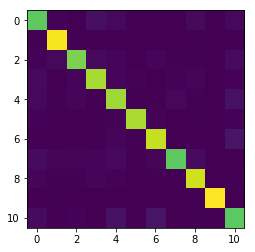

alpha= =0.025
training time:  0:00:00.133185
testing time:  0:00:00.061212
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.84      0.86      0.85      1578
   giai-tri       0.93      0.98      0.96      1830
   giao-duc       0.91      0.86      0.88      1687
   khoa-hoc       0.89      0.89      0.89      1760
 kinh-doanh       0.85      0.86      0.85      1800
 oto-xe-may       0.97      0.94      0.95      1682
  phap-luat       0.89      0.92      0.90      1800
     so-hoa       0.94      0.85      0.89      1610
   the-gioi       0.89      0.94      0.91      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.83      0.82      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.900357594386
accuracy score
0.901731670088
confusion matrix:
[[1357   17    5   74   35    1    7    2   44    0   36]
 [  10 1787    8    4    4    1    2    5    8    0    1]
 [  21   37 1446   

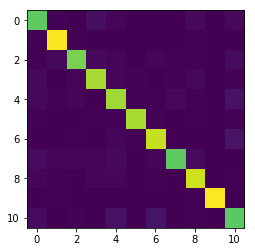

alpha= =0.01
training time:  0:00:00.135982
testing time:  0:00:00.044257
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.83      0.86      0.85      1578
   giai-tri       0.93      0.98      0.95      1830
   giao-duc       0.91      0.85      0.88      1687
   khoa-hoc       0.89      0.89      0.89      1760
 kinh-doanh       0.84      0.86      0.85      1800
 oto-xe-may       0.97      0.94      0.95      1682
  phap-luat       0.89      0.92      0.90      1800
     so-hoa       0.94      0.84      0.89      1610
   the-gioi       0.90      0.94      0.92      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.83      0.82      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.900470708622
accuracy score
0.901836938786
confusion matrix:
[[1363   17    5   70   34    1    5    2   44    0   37]
 [  11 1787    7    4    4    1    1    4    9    0    2]
 [  22   36 1442   4

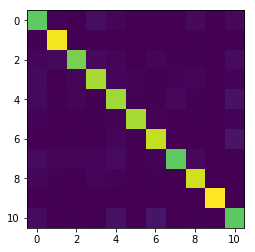

alpha= =0.001
training time:  0:00:00.137840
testing time:  0:00:00.049741
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.83      0.87      0.85      1578
   giai-tri       0.93      0.98      0.95      1830
   giao-duc       0.91      0.85      0.88      1687
   khoa-hoc       0.89      0.88      0.89      1760
 kinh-doanh       0.84      0.86      0.85      1800
 oto-xe-may       0.97      0.93      0.95      1682
  phap-luat       0.89      0.91      0.90      1800
     so-hoa       0.94      0.85      0.89      1610
   the-gioi       0.90      0.94      0.92      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.80      0.83      0.82      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.899495737788
accuracy score
0.900836886152
confusion matrix:
[[1365   22    5   67   35    1    3    2   41    0   37]
 [  13 1787    8    2    6    0    1    2    9    0    2]
 [  23   41 1430   

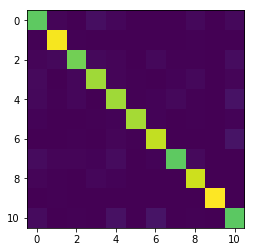

alpha= =0.0001
training time:  0:00:00.139417
testing time:  0:00:00.056257
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.82      0.87      0.84      1578
   giai-tri       0.92      0.98      0.95      1830
   giao-duc       0.92      0.84      0.88      1687
   khoa-hoc       0.90      0.87      0.88      1760
 kinh-doanh       0.84      0.87      0.85      1800
 oto-xe-may       0.97      0.93      0.95      1682
  phap-luat       0.89      0.91      0.90      1800
     so-hoa       0.94      0.85      0.89      1610
   the-gioi       0.90      0.93      0.92      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.80      0.83      0.81      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.897261975158
accuracy score
0.898573609137
confusion matrix:
[[1368   21    6   64   34    1    2    3   41    0   38]
 [  13 1789    7    2    5    0    1    2    9    0    2]
 [  27   46 1417  

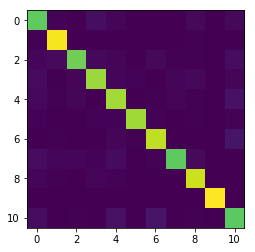

In [77]:
#Tuning Parameter
alpha=[1,0.75,0.5,0.25,0.1,0.075,0.05,0.025,0.01,0.001,0.0001]

for a in alpha:
    print "alpha= =" + str(a)
    mnb = MultinomialNB(a)
    mnb_me = testClassifier(train_mat, train_lbl, test_mat, test_lbl, mnb)
    metrics_dict.update({a:mnb_me})


(0.0001, 0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1)
(0.89857360913732298, 0.90083688615190272, 0.90183693878625193, 0.90173167008789934, 0.90199484183378076, 0.90194220748460441, 0.90099478919943154, 0.89915258697826206, 0.89767882520132636, 0.89531027948839415, 0.89373124901310597)


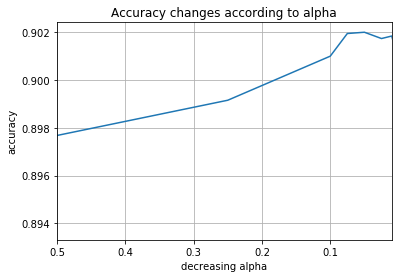

In [78]:
lists = sorted(metrics_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
print x
print y
plt.plot(x, y)
plt.gca().invert_xaxis()
plt.xlim(0.5, 0.01)  # decreasing time
plt.xlabel('decreasing alpha')
plt.ylabel('accuracy')
plt.title('Accuracy changes according to alpha')
plt.grid(True)

plt.show()

In [79]:
metrics_dict = {}

alpha= =1
training time:  0:00:00.171782
testing time:  0:00:00.113656
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.88      0.70      0.78      1578
   giai-tri       0.94      0.95      0.95      1830
   giao-duc       0.88      0.65      0.75      1687
   khoa-hoc       0.85      0.74      0.79      1760
 kinh-doanh       0.78      0.89      0.83      1800
 oto-xe-may       0.57      0.90      0.70      1682
  phap-luat       0.80      0.88      0.84      1800
     so-hoa       0.94      0.74      0.83      1610
   the-gioi       0.85      0.92      0.88      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.71      0.75      1630

avg / total       0.85      0.83      0.83     18999
"
f1 score
0.825508244972
accuracy score
0.827306700353
confusion matrix:
[[1098   23   13  105   52   93   17    4  105    0   68]
 [  12 1740   19    4    7    4   10    8   20    1    5]
 [   9   19 1094   24  

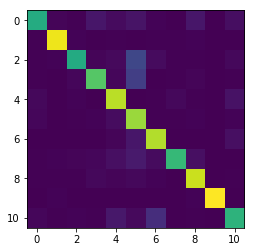

alpha= =0.75
training time:  0:00:00.165053
testing time:  0:00:00.114607
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.88      0.71      0.78      1578
   giai-tri       0.94      0.95      0.95      1830
   giao-duc       0.89      0.65      0.75      1687
   khoa-hoc       0.86      0.75      0.80      1760
 kinh-doanh       0.79      0.89      0.83      1800
 oto-xe-may       0.58      0.90      0.70      1682
  phap-luat       0.81      0.88      0.84      1800
     so-hoa       0.94      0.75      0.83      1610
   the-gioi       0.85      0.92      0.88      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.72      0.76      1630

avg / total       0.85      0.83      0.83     18999
"
f1 score
0.829414509645
accuracy score
0.831043739144
confusion matrix:
[[1119   22   14   97   47   92   17    4   98    0   68]
 [  13 1747   16    3    6    3    8    8   20    1    5]
 [  10   19 1103   2

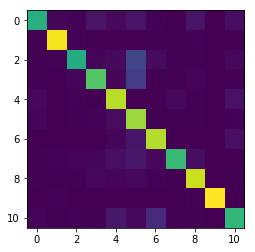

alpha= =0.5
training time:  0:00:00.165289
testing time:  0:00:00.119487
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.88      0.72      0.79      1578
   giai-tri       0.94      0.96      0.95      1830
   giao-duc       0.88      0.66      0.75      1687
   khoa-hoc       0.86      0.75      0.80      1760
 kinh-doanh       0.79      0.88      0.84      1800
 oto-xe-may       0.58      0.90      0.71      1682
  phap-luat       0.82      0.88      0.85      1800
     so-hoa       0.94      0.75      0.83      1610
   the-gioi       0.86      0.92      0.89      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.74      0.77      1630

avg / total       0.85      0.83      0.84     18999
"
f1 score
0.833138363531
accuracy score
0.834622874888
confusion matrix:
[[1142   21   14   93   44   88   16    3   95    0   62]
 [  13 1749   17    4    6    1    8    8   19    0    5]
 [  10   20 1112   24

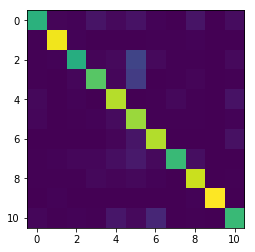

alpha= =0.25
training time:  0:00:00.175626
testing time:  0:00:00.111576
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.88      0.74      0.80      1578
   giai-tri       0.94      0.96      0.95      1830
   giao-duc       0.89      0.67      0.77      1687
   khoa-hoc       0.87      0.76      0.81      1760
 kinh-doanh       0.80      0.88      0.84      1800
 oto-xe-may       0.60      0.90      0.72      1682
  phap-luat       0.83      0.88      0.85      1800
     so-hoa       0.94      0.76      0.84      1610
   the-gioi       0.87      0.92      0.89      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.76      0.77      1630

avg / total       0.86      0.84      0.84     18999
"
f1 score
0.839149353486
accuracy score
0.840517921996
confusion matrix:
[[1166   21   12   86   43   85   14    3   85    0   63]
 [  13 1752   17    4    6    1    6    7   19    0    5]
 [  10   19 1137   2

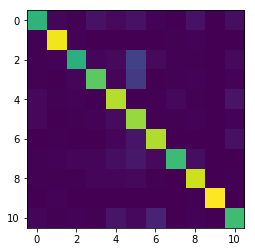

alpha= =0.1
training time:  0:00:00.173870
testing time:  0:00:00.115119
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.87      0.75      0.80      1578
   giai-tri       0.94      0.96      0.95      1830
   giao-duc       0.90      0.70      0.78      1687
   khoa-hoc       0.87      0.77      0.82      1760
 kinh-doanh       0.81      0.89      0.85      1800
 oto-xe-may       0.61      0.90      0.73      1682
  phap-luat       0.84      0.88      0.86      1800
     so-hoa       0.94      0.77      0.85      1610
   the-gioi       0.87      0.92      0.90      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.77      0.78      1630

avg / total       0.86      0.85      0.85     18999
"
f1 score
0.844959706992
accuracy score
0.846412969104
confusion matrix:
[[1179   20   11   84   40   84   12    4   80    0   64]
 [  16 1759   15    3    5    1    4    6   16    0    5]
 [  11   20 1174   25

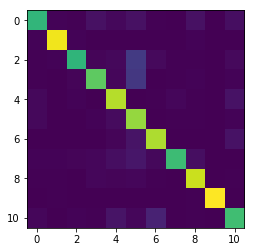

alpha= =0.075
training time:  0:00:00.174975
testing time:  0:00:00.110120
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.87      0.75      0.81      1578
   giai-tri       0.94      0.96      0.95      1830
   giao-duc       0.90      0.70      0.79      1687
   khoa-hoc       0.87      0.77      0.82      1760
 kinh-doanh       0.81      0.89      0.85      1800
 oto-xe-may       0.62      0.90      0.73      1682
  phap-luat       0.84      0.88      0.86      1800
     so-hoa       0.94      0.77      0.85      1610
   the-gioi       0.88      0.92      0.90      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.77      0.78      1630

avg / total       0.86      0.85      0.85     18999
"
f1 score
0.846788188014
accuracy score
0.848202536976
confusion matrix:
[[1191   20   10   80   40   84   12    4   75    0   62]
 [  15 1761   13    3    6    1    4    6   16    0    5]
 [  12   21 1181   

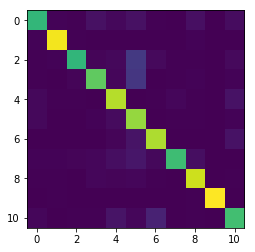

alpha= =0.05
training time:  0:00:00.172408
testing time:  0:00:00.111496
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.87      0.76      0.81      1578
   giai-tri       0.94      0.96      0.95      1830
   giao-duc       0.91      0.71      0.79      1687
   khoa-hoc       0.87      0.77      0.82      1760
 kinh-doanh       0.81      0.89      0.85      1800
 oto-xe-may       0.62      0.90      0.74      1682
  phap-luat       0.84      0.88      0.86      1800
     so-hoa       0.94      0.77      0.85      1610
   the-gioi       0.88      0.92      0.90      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.77      0.78      1630

avg / total       0.86      0.85      0.85     18999
"
f1 score
0.848668763712
accuracy score
0.850150007895
confusion matrix:
[[1195   17   10   82   40   82   12    4   74    0   62]
 [  15 1762   13    3    6    1    4    6   15    0    5]
 [  12   21 1193   2

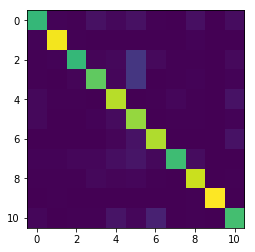

alpha= =0.025
training time:  0:00:00.162682
testing time:  0:00:00.112614
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.87      0.77      0.81      1578
   giai-tri       0.94      0.96      0.95      1830
   giao-duc       0.91      0.72      0.80      1687
   khoa-hoc       0.87      0.77      0.82      1760
 kinh-doanh       0.81      0.89      0.85      1800
 oto-xe-may       0.64      0.90      0.74      1682
  phap-luat       0.85      0.88      0.86      1800
     so-hoa       0.95      0.77      0.85      1610
   the-gioi       0.88      0.93      0.90      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.78      0.78      1630

avg / total       0.86      0.85      0.85     18999
"
f1 score
0.852170899178
accuracy score
0.853729143639
confusion matrix:
[[1208   15   11   77   40   80   12    3   69    0   63]
 [  16 1765   12    3    6    1    3    6   14    0    4]
 [  12   21 1216   

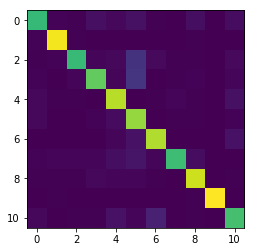

alpha= =0.01
training time:  0:00:00.152957
testing time:  0:00:00.108350
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.87      0.77      0.82      1578
   giai-tri       0.94      0.97      0.95      1830
   giao-duc       0.91      0.73      0.81      1687
   khoa-hoc       0.87      0.78      0.82      1760
 kinh-doanh       0.82      0.90      0.86      1800
 oto-xe-may       0.65      0.90      0.75      1682
  phap-luat       0.85      0.88      0.87      1800
     so-hoa       0.95      0.77      0.85      1610
   the-gioi       0.88      0.93      0.91      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.78      0.79      1630

avg / total       0.87      0.86      0.86     18999
"
f1 score
0.855460667558
accuracy score
0.857097741986
confusion matrix:
[[1220   16   11   74   39   78   12    2   65    0   61]
 [  16 1766   12    3    5    1    3    6   14    0    4]
 [  12   25 1235   3

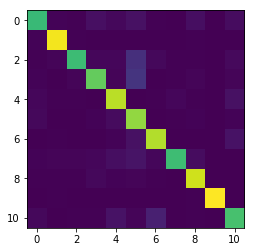

alpha= =0.005
training time:  0:00:00.164343
testing time:  0:00:00.111140
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.86      0.78      0.82      1578
   giai-tri       0.94      0.97      0.95      1830
   giao-duc       0.92      0.74      0.82      1687
   khoa-hoc       0.86      0.78      0.82      1760
 kinh-doanh       0.82      0.90      0.86      1800
 oto-xe-may       0.66      0.90      0.76      1682
  phap-luat       0.86      0.89      0.87      1800
     so-hoa       0.95      0.77      0.85      1610
   the-gioi       0.89      0.93      0.91      1792
   the-thao       1.00      0.98      0.99      1830
    thoi-su       0.79      0.79      0.79      1630

avg / total       0.87      0.86      0.86     18999
"
f1 score
0.857397603611
accuracy score
0.859150481604
confusion matrix:
[[1224   17   11   76   38   75   10    2   67    0   58]
 [  16 1769   11    3    6    1    3    4   13    0    4]
 [  12   26 1242   

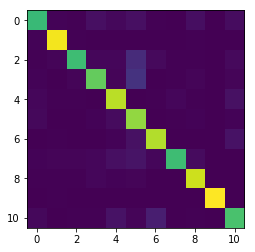

alpha= =0.001
training time:  0:00:00.160364
testing time:  0:00:00.112487
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.86      0.78      0.82      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.92      0.76      0.83      1687
   khoa-hoc       0.86      0.79      0.82      1760
 kinh-doanh       0.82      0.90      0.86      1800
 oto-xe-may       0.68      0.90      0.77      1682
  phap-luat       0.86      0.89      0.88      1800
     so-hoa       0.95      0.77      0.85      1610
   the-gioi       0.89      0.93      0.91      1792
   the-thao       1.00      0.99      0.99      1830
    thoi-su       0.80      0.79      0.80      1630

avg / total       0.87      0.86      0.86     18999
"
f1 score
0.86209741439
accuracy score
0.863992841729
confusion matrix:
[[1238   18   12   69   35   70    9    2   66    0   59]
 [  15 1775   10    2    6    1    2    4   11    0    4]
 [  11   27 1275   4

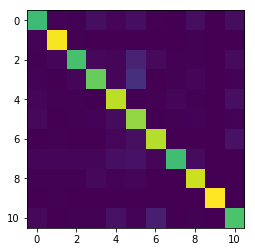

In [80]:
#Tuning Parameter
alpha=[1,0.75,0.5,0.25,0.1,0.075,0.05,0.025,0.01,0.005,0.001]

for a in alpha:
    print "alpha= =" + str(a)
    bnb = BernoulliNB(a)
    bnb_me = testClassifier(train_mat, train_lbl, test_mat, test_lbl, bnb)
    metrics_dict.update({a:bnb_me})


(0.001, 0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1)
(0.86399284172851198, 0.85915048160429497, 0.8570977419864203, 0.85372914363913888, 0.85015000789515238, 0.84820253697563031, 0.84641296910363706, 0.84051792199589448, 0.83462287488815201, 0.83104373914416552, 0.82730670035265019)


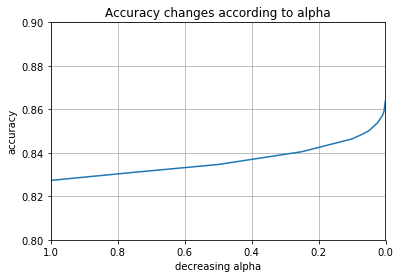

In [81]:
lists = sorted(metrics_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
print x
print y
plt.plot(x, y)
plt.gca().invert_xaxis()
plt.xlim(1, 0.001)  # decreasing time
plt.ylim(0.8, 0.9)
plt.xlabel('decreasing alpha')
plt.ylabel('accuracy')
plt.title('Accuracy changes according to alpha')
plt.grid(True)

plt.show()